In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('ph-data.csv')

In [4]:
df.isnull().sum()

blue     0
green    0
red      0
label    0
dtype: int64

In [6]:
df['label'].value_counts()

label
1     44
2     44
3     44
4     44
5     44
6     44
7     44
8     44
9     44
10    44
11    44
12    44
14    44
13    43
0     38
Name: count, dtype: int64

In [7]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=24)

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix

In [11]:
from sklearn import preprocessing
X_train_normalized = preprocessing.normalize(x_train)
X_test_normalized = preprocessing.normalize(x_test)

In [12]:
def normalize_rgb(data):
    total = data['blue'] + data['green'] + data['red']
    data['red'] = data['red'] / total
    data['blue'] = data['blue'] / total
    data['green'] = data['green'] / total
    return data


In [14]:
X_train_percentage = normalize_rgb(x_train)
X_test_percentage = normalize_rgb(x_test)

SVM Accuracy: 0.6946564885496184
Precision: 0.7135003249507066
Recall: 0.6946564885496184
F1-Score: 0.6889667029551062
Confusion Matrix:
[[ 9  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  4  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  5  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  8  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  6  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4  3  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1 11  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  4  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 10  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  7  1  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2  3  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  7  2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  3  6]]


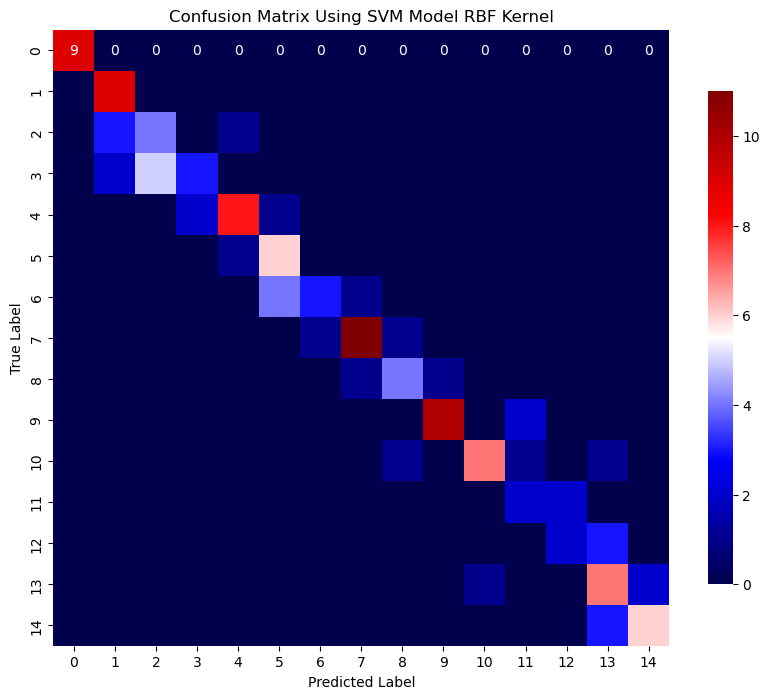

In [20]:
from sklearn.svm import SVC

svc_model = SVC(kernel='rbf', C=1000)  
svc_model.fit(x_train, y_train)

# Predicting the target variable for the test set
svc_predictions = svc_model.predict(x_test)

# Calculating accuracy score for KNN
svc_accuracy1 = accuracy_score(y_test, svc_predictions)
print("SVM Accuracy:", svc_accuracy1)

# Precision
precision = precision_score(y_test, svc_predictions, average='weighted')  
print("Precision:", precision)

# Recall
recall = recall_score(y_test,svc_predictions, average='weighted')  
print("Recall:", recall)

# F1-Score
f1 = f1_score(y_test, svc_predictions, average='weighted')  
print("F1-Score:", f1)

# Confusion Matrix
conf_matrix5 = confusion_matrix(y_test, svc_predictions)
print("Confusion Matrix:")
print(conf_matrix5)

# unique class labels from y_test
class_labels = sorted(set(y_test))

# Plotting Confusion Matrix as a Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix5, annot=True, fmt='d', cmap='seismic', square=True,
            xticklabels=class_labels, yticklabels=class_labels,
            cbar_kws={"shrink": 0.8})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Using SVM Model RBF Kernel')
plt.show()

SVC Accuracy: 0.6946564885496184
Precision: 0.7182446052675061
Recall: 0.6946564885496184
F1-Score: 0.6872098891796301
Confusion Matrix:
[[ 9  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  4  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  5  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  8  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  6  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  5  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1 11  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  5  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 10  1  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  7  1  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2  1  2]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  1  4  4]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  8]]


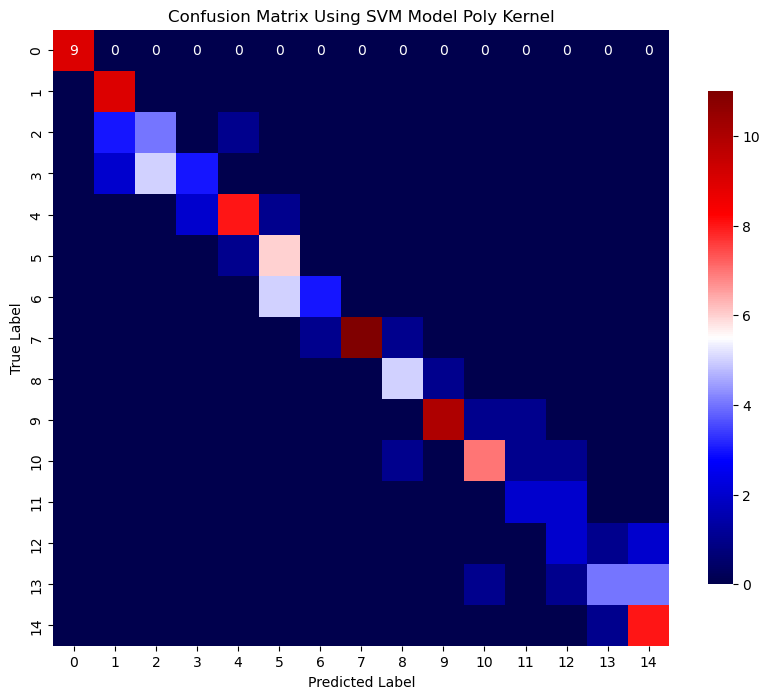

In [22]:
svc_model2 = SVC(kernel='poly', C=1000,degree=3)  
svc_model2.fit(x_train, y_train)

# Predicting the target variable for the test set
svc_predictions2 = svc_model2.predict(x_test)

# Calculating accuracy score for KNN
svc_accuracy2 = accuracy_score(y_test, svc_predictions2)
print("SVC Accuracy:", svc_accuracy2)

# Precision
precision = precision_score(y_test, svc_predictions2, average='weighted')  
print("Precision:", precision)

# Recall
recall = recall_score(y_test,svc_predictions2, average='weighted')  
print("Recall:", recall)

# F1-Score
f1 = f1_score(y_test, svc_predictions2, average='weighted')  
print("F1-Score:", f1)

# Confusion Matrix
conf_matrix6 = confusion_matrix(y_test, svc_predictions2)
print("Confusion Matrix:")
print(conf_matrix6)

# unique class labels from y_test
class_labels = sorted(set(y_test))

# Plotting Confusion Matrix as a Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix6, annot=True, fmt='d', cmap='seismic', square=True,
            xticklabels=class_labels, yticklabels=class_labels,
            cbar_kws={"shrink": 0.8})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Using SVM Model Poly Kernel')
plt.show()

SVM Accuracy: 0.6946564885496184
Precision: 0.7394839681099223
Recall: 0.6946564885496184
F1-Score: 0.6925923418973144
Confusion Matrix:
[[ 9  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  4  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  5  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  8  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  6  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4  3  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1 11  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  4  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 10  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  7  1  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2  3  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  7  2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  3  6]]


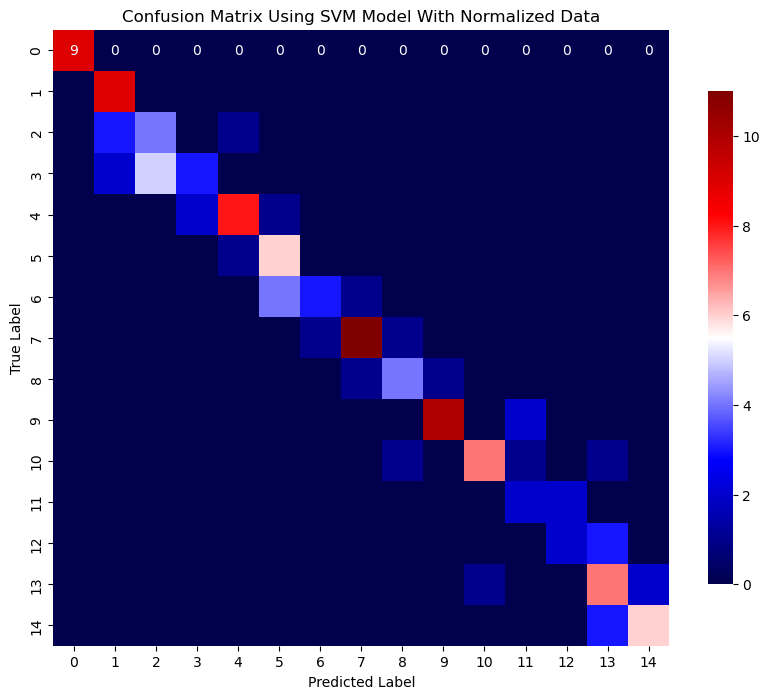

In [24]:
svc_model3 = SVC(kernel='poly', C=1000,degree=3)  
svc_model3.fit(X_train_normalized, y_train)

# Predicting the target variable for the test set
svc_predictions3 = svc_model3.predict(X_test_normalized)

# Calculating accuracy score for KNN
svc_accuracy3 = accuracy_score(y_test, svc_predictions3)
print("SVM Accuracy:", svc_accuracy3)

# Precision
precision = precision_score(y_test, svc_predictions3, average='weighted')  
print("Precision:", precision)

# Recall
recall = recall_score(y_test,svc_predictions3, average='weighted')  
print("Recall:", recall)

# F1-Score
f1 = f1_score(y_test, svc_predictions3, average='weighted')  
print("F1-Score:", f1)

# Confusion Matrix
conf_matrix7 = confusion_matrix(y_test, svc_predictions)
print("Confusion Matrix:")
print(conf_matrix7)

# unique class labels from y_test
class_labels = sorted(set(y_test))

# Plotting Confusion Matrix as a Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix7, annot=True, fmt='d', cmap='seismic', square=True,
            xticklabels=class_labels, yticklabels=class_labels,
            cbar_kws={"shrink": 0.8})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Using SVM Model With Normalized Data')
plt.show()


SVM Accuracy: 0.6946564885496184
Precision: 0.7182446052675061
Recall: 0.6946564885496184
F1-Score: 0.6872098891796301
Confusion Matrix:
[[ 9  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  4  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  5  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  8  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  6  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  5  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1 11  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  5  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 10  1  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  7  1  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2  1  2]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  1  4  4]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  8]]


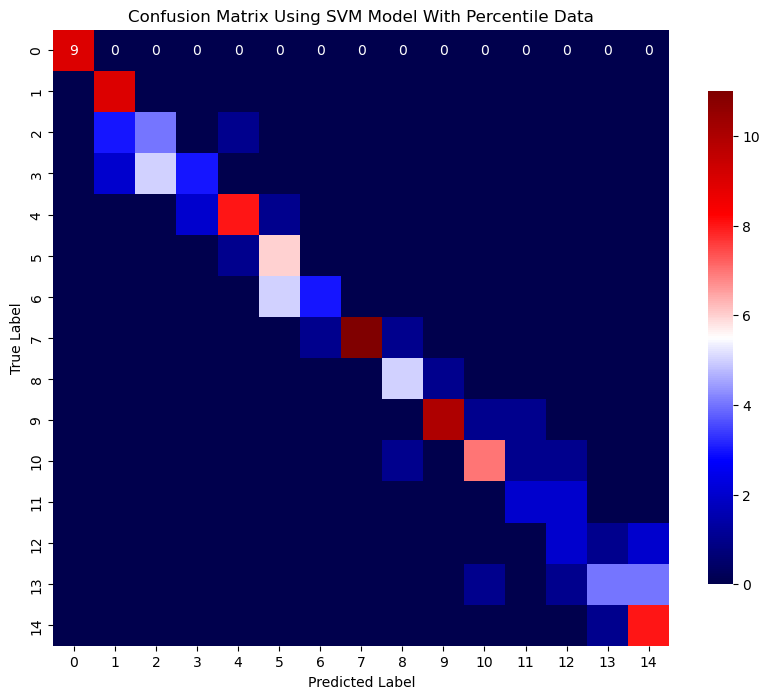

In [27]:
svc_model4 = SVC(kernel='poly', C=1000,degree=3) 
svc_model4.fit(X_train_percentage , y_train)

# Predicting the target variable for the test set
svc_predictions4 = svc_model4.predict(X_test_percentage )

# Calculating accuracy score for SVM
svc_accuracy4 = accuracy_score(y_test, svc_predictions)
print("SVM Accuracy:", svc_accuracy4)

# Precision
precision = precision_score(y_test, svc_predictions4, average='weighted')  
print("Precision:", precision)

# Recall
recall = recall_score(y_test,svc_predictions4, average='weighted')  
print("Recall:", recall)

# F1-Score
f1 = f1_score(y_test, svc_predictions4, average='weighted')  
print("F1-Score:", f1)

# Confusion Matrix
conf_matrix8 = confusion_matrix(y_test, svc_predictions4)
print("Confusion Matrix:")
print(conf_matrix8)

# unique class labels from y_test
class_labels = sorted(set(y_test))

# Plotting Confusion Matrix as a Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix8, annot=True, fmt='d', cmap='seismic', square=True,
            xticklabels=class_labels, yticklabels=class_labels,
            cbar_kws={"shrink": 0.8})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Using SVM Model With Percentile Data')
plt.show()

<p6> <b> SVM Model With Normalized Data gives Highest Precision and Accuracy than Other three SVM Models </b>
